# **Exploratory Data Analysis - Terrorism**

## **1. Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/EDA_Dataset.csv',encoding='ISO-8859-1')
df.head()

<ipython-input-4-567b6af8f2d9>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/EDA_Dataset.csv',encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace='True')

**Renamed dataset**

In [10]:
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**Necessary Fields**

In [11]:
ndf=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','location','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [13]:
ndf.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,location,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,NaN,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,NaN,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


## **2. Cleaning the Dataset**

In [14]:
ndf.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
location       126196
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [16]:
new_df=ndf.dropna()
new_df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,location,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
14,1970,1,9,United States,Puerto Rico,North America,Rio Piedras,18.386932,-66.061127,Caparra Shopping Center,Facility/Infrastructure Attack,0.0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...
17,1970,1,12,United States,New York,North America,New York City,40.697132,-73.931351,Brooklyn,Bombing/Explosion,0.0,0.0,James Madison High School,1/12/1970: Unknown perpetrators threw a pipe b...,Black Nationalists,Educational Institution,Explosives,Suspected motives were to protest the Vietnam ...
22,1970,1,19,United States,Washington,North America,Seattle,47.610786,-122.331306,Seattle University,Bombing/Explosion,0.0,0.0,"Liberal Arts and Garrand buildings, Seattle Un...",1/17/1970: Three African Americans were suspec...,Black Nationalists,Educational Institution,Explosives,The incident took place during disturbances be...
24,1970,1,19,United States,New Jersey,North America,Jersey City,40.717892,-74.067467,Front of building,Facility/Infrastructure Attack,0.0,0.0,Headquarters,1/19/1970: Unknown perpetrators ignited a fire...,White extremists,Violent Political Party,Incendiary,Intimidate the Black Panther Party.
30,1970,1,25,United States,New York,North America,New York City,40.697132,-73.931351,Manhattan,Armed Assault,0.0,2.0,New York Police Officers responding to a call ...,1/25/1970: Responding to what authorities beli...,Black Nationalists,Police,Firearms,To kill police


In [17]:
new_df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
state          0
Region         0
city           0
latitude       0
longitude      0
location       0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

In [18]:
print("Country with the most attacks:",new_df['Country'].value_counts().idxmax())
print("City with the most attacks:",new_df['city'].value_counts().index[0])
print("Region with the most attacks:",new_df['Region'].value_counts().idxmax())
print("Year with the most attacks:",new_df['Year'].value_counts().idxmax())
print("Month with the most attacks:",new_df['Month'].value_counts().idxmax())
print("Group with the most attacks:",new_df['Group'].value_counts().index[1])
print("Most Attack Types:",new_df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: South Asia
Year with the most attacks: 2011
Month with the most attacks: 7
Group with the most attacks: Communist Party of India - Maoist (CPI-Maoist)
Most Attack Types: Bombing/Explosion


**No.of Attacks in each year**

In [20]:
new_df['Year'].value_counts(dropna = False).sort_index()

1970     143
1971      61
1972      37
1973      24
1974      28
1975      12
1976      27
1977      13
1978      23
1979      10
1980      16
1981      16
1982      14
1983       9
1984      22
1985      18
1986      19
1987      14
1988      16
1989      13
1990      14
1991      18
1992      16
1994      19
1995      16
1996      13
1997      14
1998     184
1999     285
2000     522
2001     706
2002     418
2003     245
2004     207
2005     582
2006     703
2007    1003
2008    3154
2009    3667
2010    4026
2011    4156
2012     748
2013    1148
2014     560
2015     728
2016     650
2017    1108
Name: Year, dtype: int64

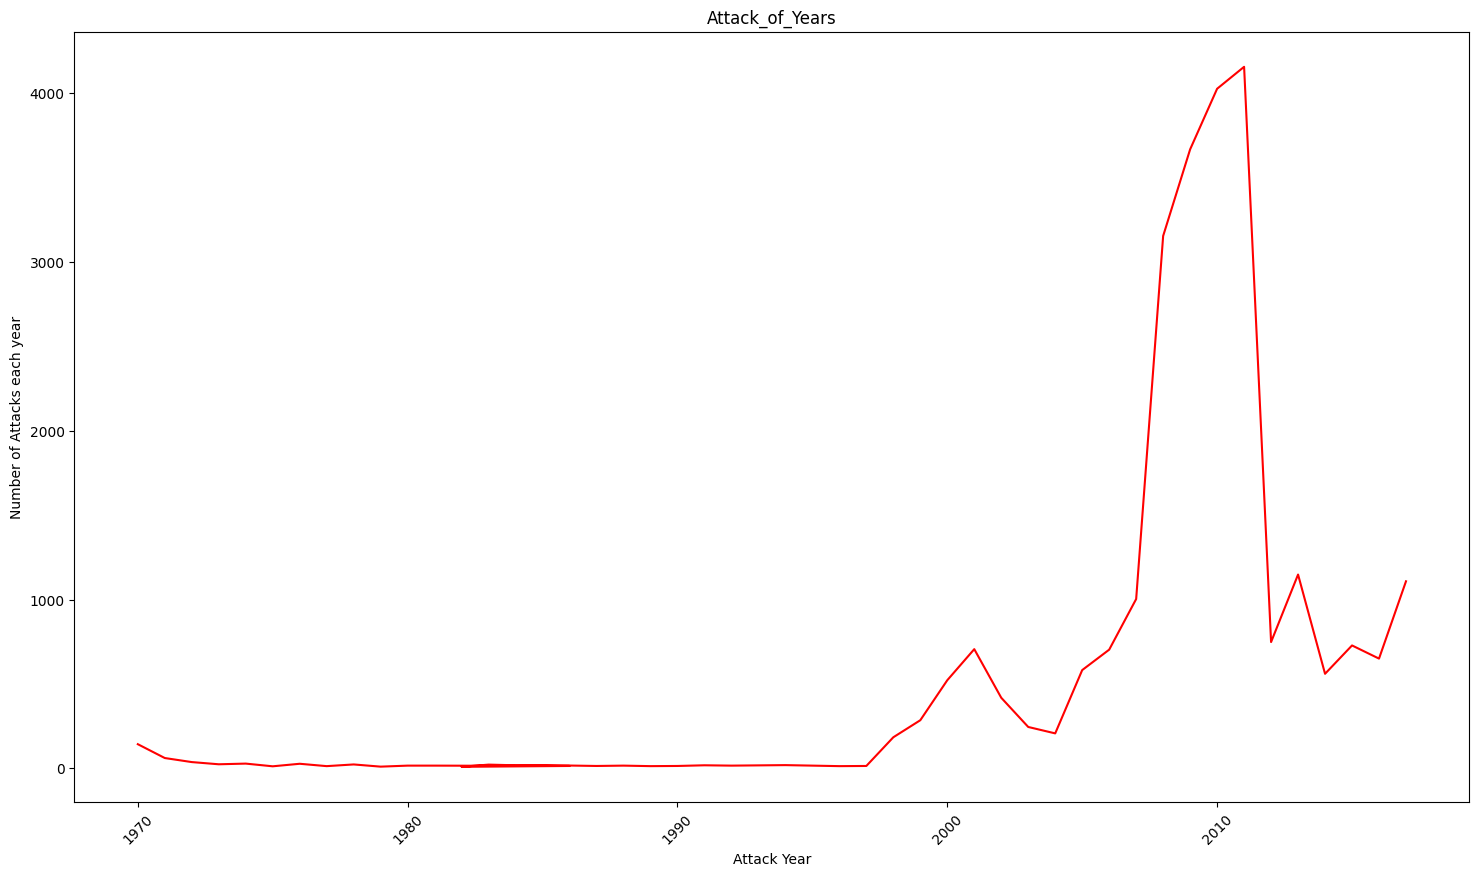

In [30]:
x_year = new_df['Year'].unique()
y_count_years = new_df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
plt.plot( x_year, y_count_years,color='red')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

**Terrorist Activities by Region in each Year**

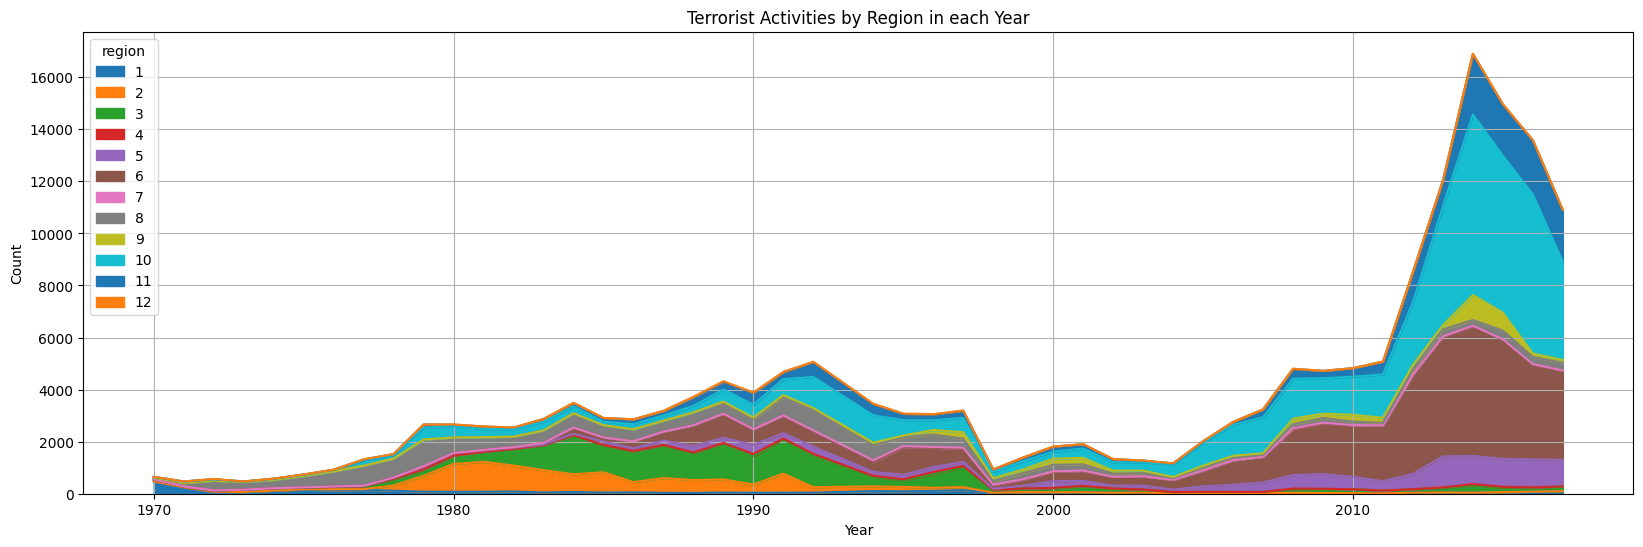

In [35]:
pd.crosstab(df.Year,df.region).plot(kind='area',figsize=(20,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Terrorist Activities by Region in each Year')
plt.grid(True)
plt.show()

In [38]:
r_type=df.region.value_counts().to_frame().reset_index()
r_type.columns=['region_name','count']
r_type

,region_name,count
0,10,50474
1,6,44974
2,3,18978
3,11,17550
4,8,16639
5,5,12485
6,2,10344
7,9,5144
8,1,3456
9,4,802


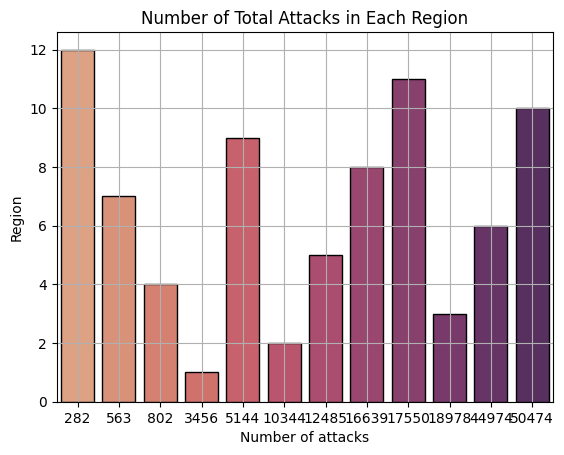

In [40]:
sns.barplot(y='region_name',x='count',data=r_type,orient='v',palette='flare',ec='black')
plt.grid(True)
plt.title("Number of Total Attacks in Each Region")
plt.ylabel('Region')
plt.xlabel('Number of attacks')
plt.show()

In [41]:
top_10_country=new_df.country.value_counts()[:10].to_frame().reset_index()
top_10_country

,index,country
0,95,24636
1,153,14368
2,4,12731
3,92,11960
4,45,8306
5,160,6908
6,159,6096
7,61,5320
8,603,5235
9,209,4292


### **Top Countries affected by Terror Attacks**

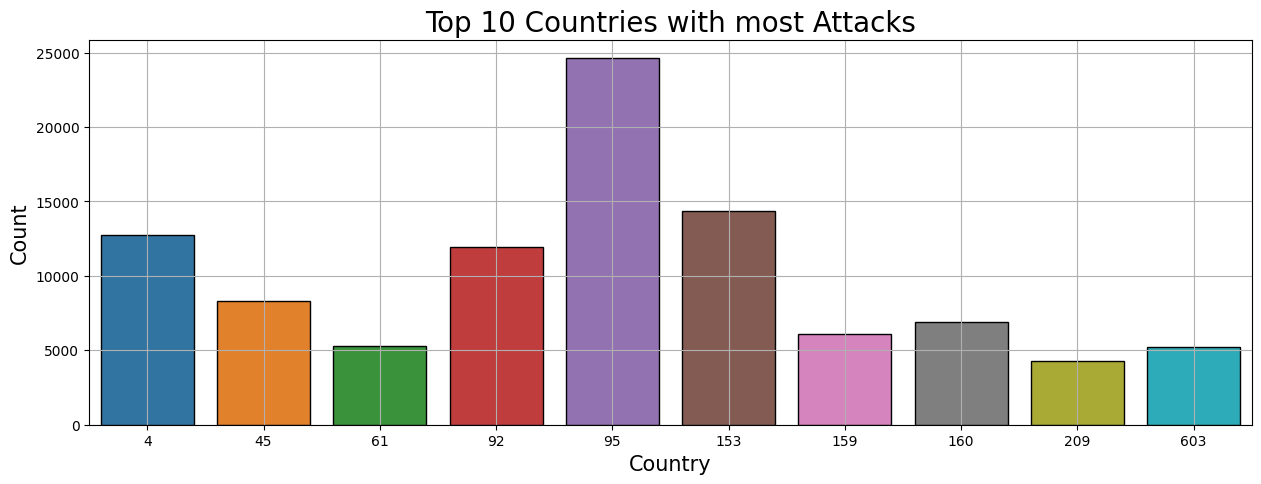

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_country,x='country_name',y='count',ec='black',lw=1)
plt.grid(True)
plt.title('Top 10 Countries with most Attacks',fontsize=20)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

**Target Methods by Terrorists**

In [46]:
t_type=df.AttackType.value_counts()[0:10].to_frame().reset_index()
t_type

,index,AttackType
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hostage Taking (Barricade Incident),991
8,Hijacking,659


In [47]:
t_type.columns=['target_type','count']
t_type

,target_type,count
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hostage Taking (Barricade Incident),991
8,Hijacking,659


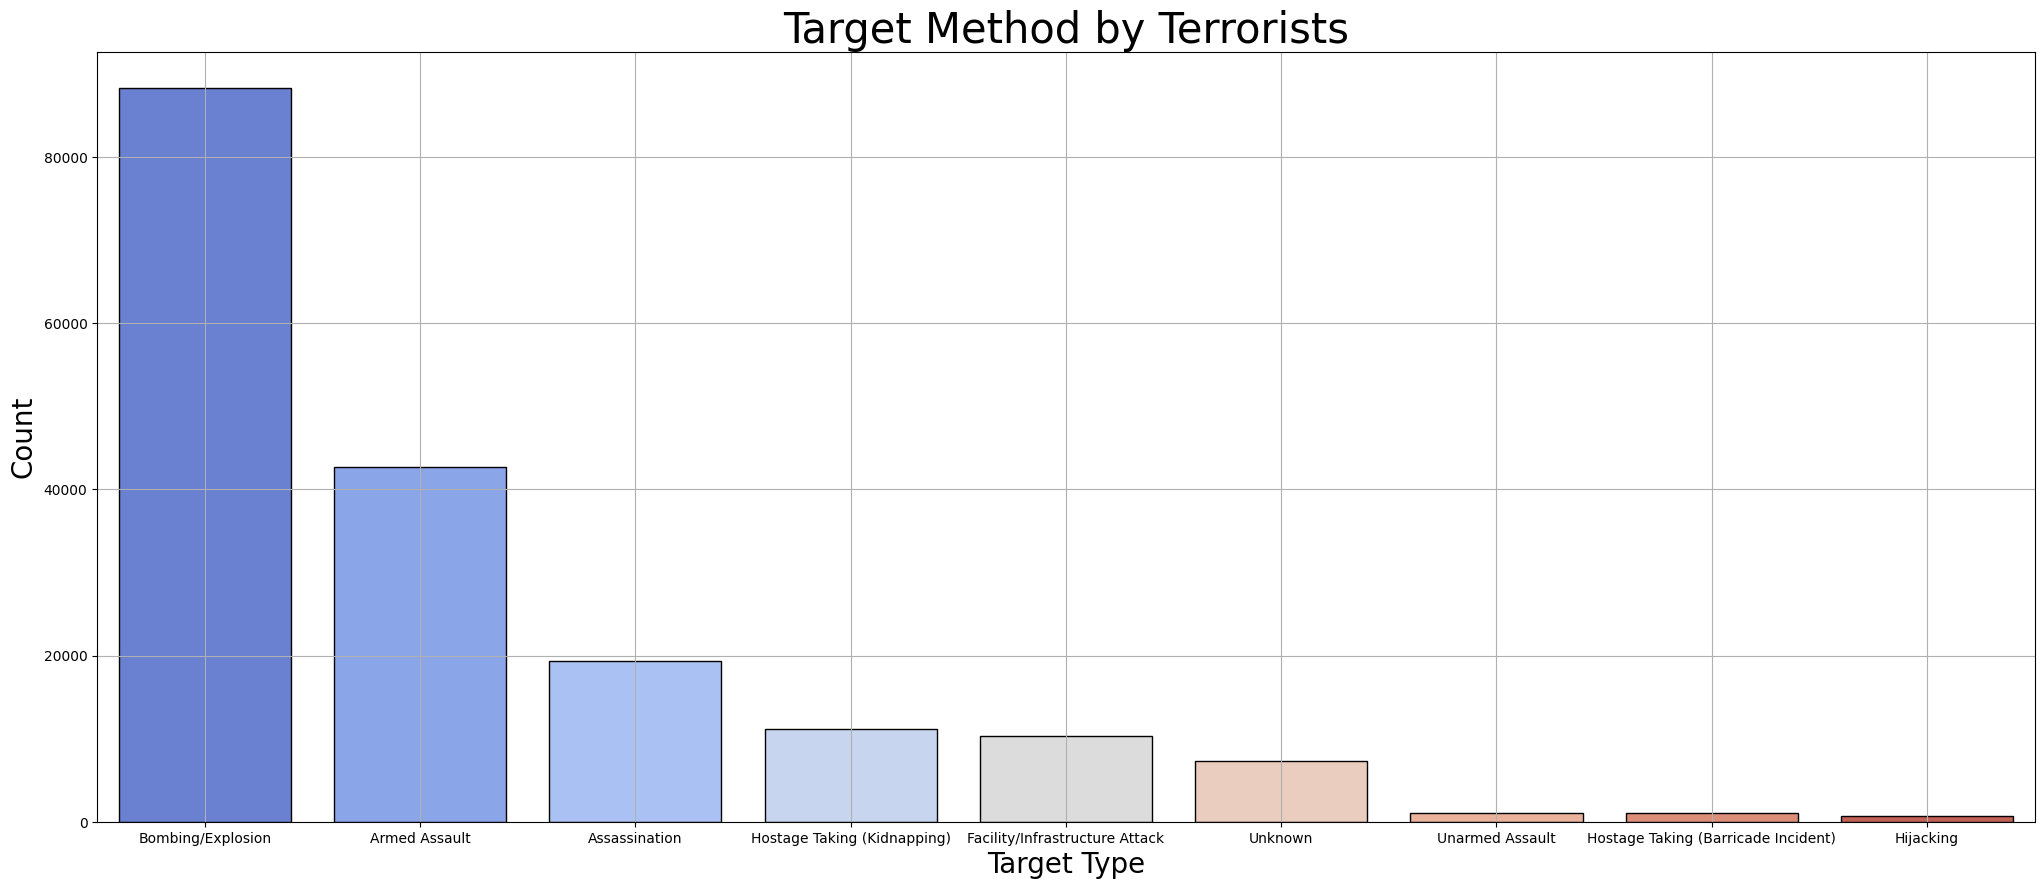

In [53]:
plt.figure(figsize=(25,10))
sns.barplot(x='target_type',y='count',data=t_type,palette='coolwarm',ec='black')
plt.xlabel('Target Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Target Method by Terrorists",fontsize=30)
plt.grid(True)

**Most active terrorist group in the world**

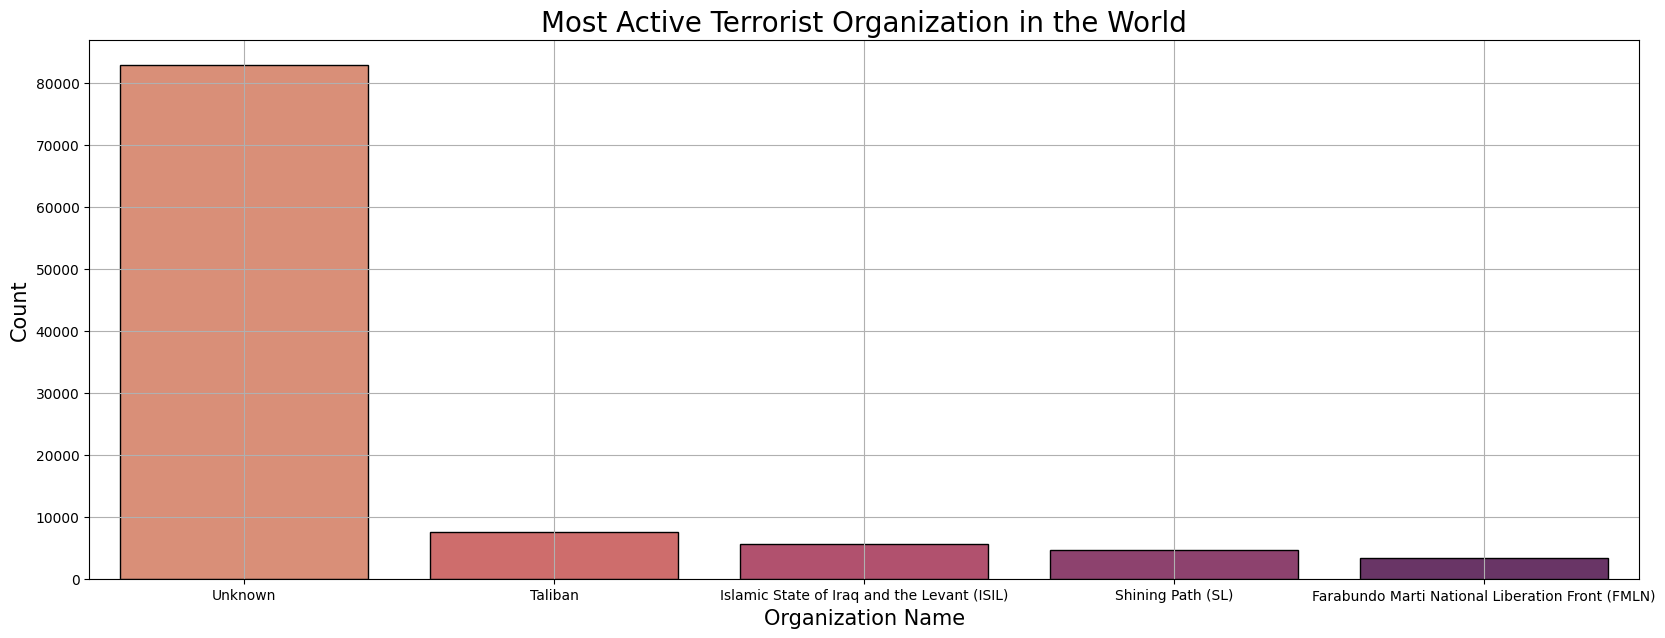

In [57]:
plt.figure(figsize=(20,7))
g_type = df.Group.value_counts()[:5].to_frame().reset_index()
g_type.columns=['organization_name','count']
sns.barplot(x='organization_name',y='count',data=g_type,ec='black',palette='flare')
plt.title('Most Active Terrorist Organization in the World',fontsize=20)
plt.xlabel('Organization Name',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.grid(True)

City where terrorist killed most number of people in the world ?

In [58]:
top10_city=df.city.value_counts().to_frame()[0:10].reset_index()
top10_city.columns=['city','count']
top10_city

,city,count
0,Unknown,9775
1,Baghdad,7589
2,Karachi,2652
3,Lima,2359
4,Mosul,2265
5,Belfast,2171
6,Santiago,1621
7,Mogadishu,1581
8,San Salvador,1558
9,Istanbul,1048


<ipython-input-60-d3c85414531d>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = top10_city,x = 'city',y = 'count',palette='magma_r',markers=True, dashes=False)


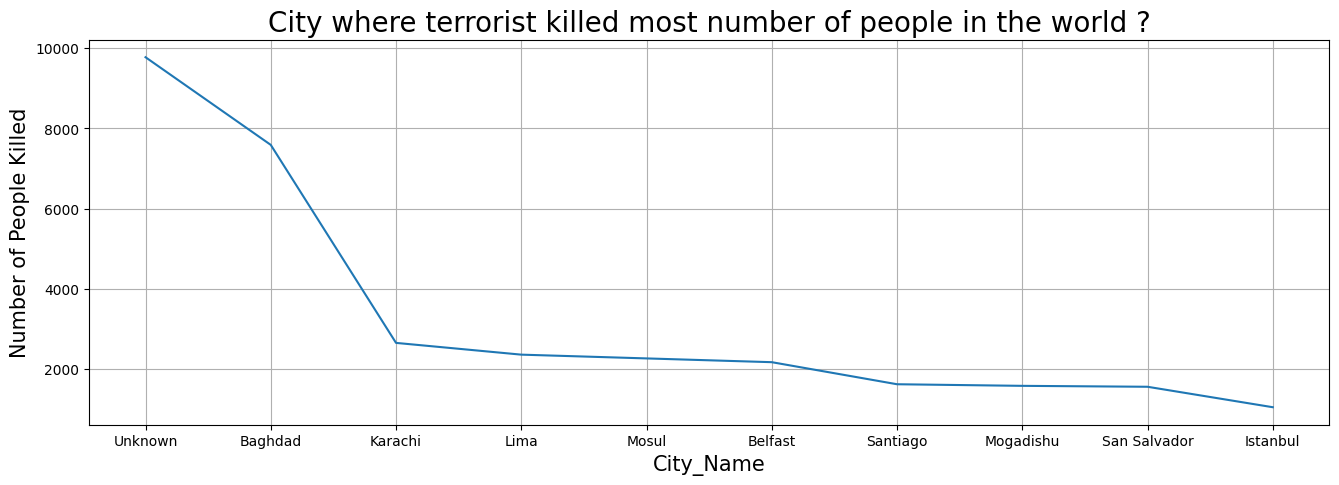

In [60]:
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = top10_city,x = 'city',y = 'count',palette='magma_r',markers=True, dashes=False)
plt.title("City where terrorist killed most number of people in the world ?",fontsize=20)
plt.xlabel('City_Name',fontsize=15)
plt.ylabel('Number of People Killed',fontsize=15)
plt.grid(True)
plt.show()